In [1]:
# Steps of the project
#1. Import the data
#2. Analyze, Understand and Clean the data
#3. Split the data to train and test
#4. Pick the model and test the data to the model to predict the attrition test
#5. Impove - Optimize - Refine the code

### Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Inserting Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Preprocessing

#### Summary Statistics

In [29]:
print('Summary Statistics')
print(df.describe(include = 'all'))

Summary Statistics


#### Count Missing Values

In [32]:
print("Count of Missing Values")
print(df.isnull().sum())

Count of Missing Values


#### Check for Duplicate Rows

In [36]:
count = df.duplicated().sum()
print(f"The number of duplicate rows is: {count}")

The number of duplicate rows is: 0


#### Unique Values Per Column

In [38]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:


#### Data Alternation 

In [4]:
# Change the data in order to feed it to the model
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if str(x).strip().lower() == 'y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Change the data from string to true or false and drop the column

In [5]:
# Get python dummy function

df = df.join(pd.get_dummies(df['BusinessTravel']).astype(bool)).drop('BusinessTravel',axis=1)
df = df.join(pd.get_dummies(df['Department'],prefix = 'Department').astype(bool)).drop('Department',axis=1)
df = df.join(pd.get_dummies(df['EducationField'],prefix = 'Education').astype(bool)).drop('EducationField',axis=1)
df = df.join(pd.get_dummies(df['JobRole'],prefix = 'Role').astype(bool)).drop('JobRole',axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'],prefix = 'Status').astype(bool)).drop('MaritalStatus',axis=1)

In [8]:
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

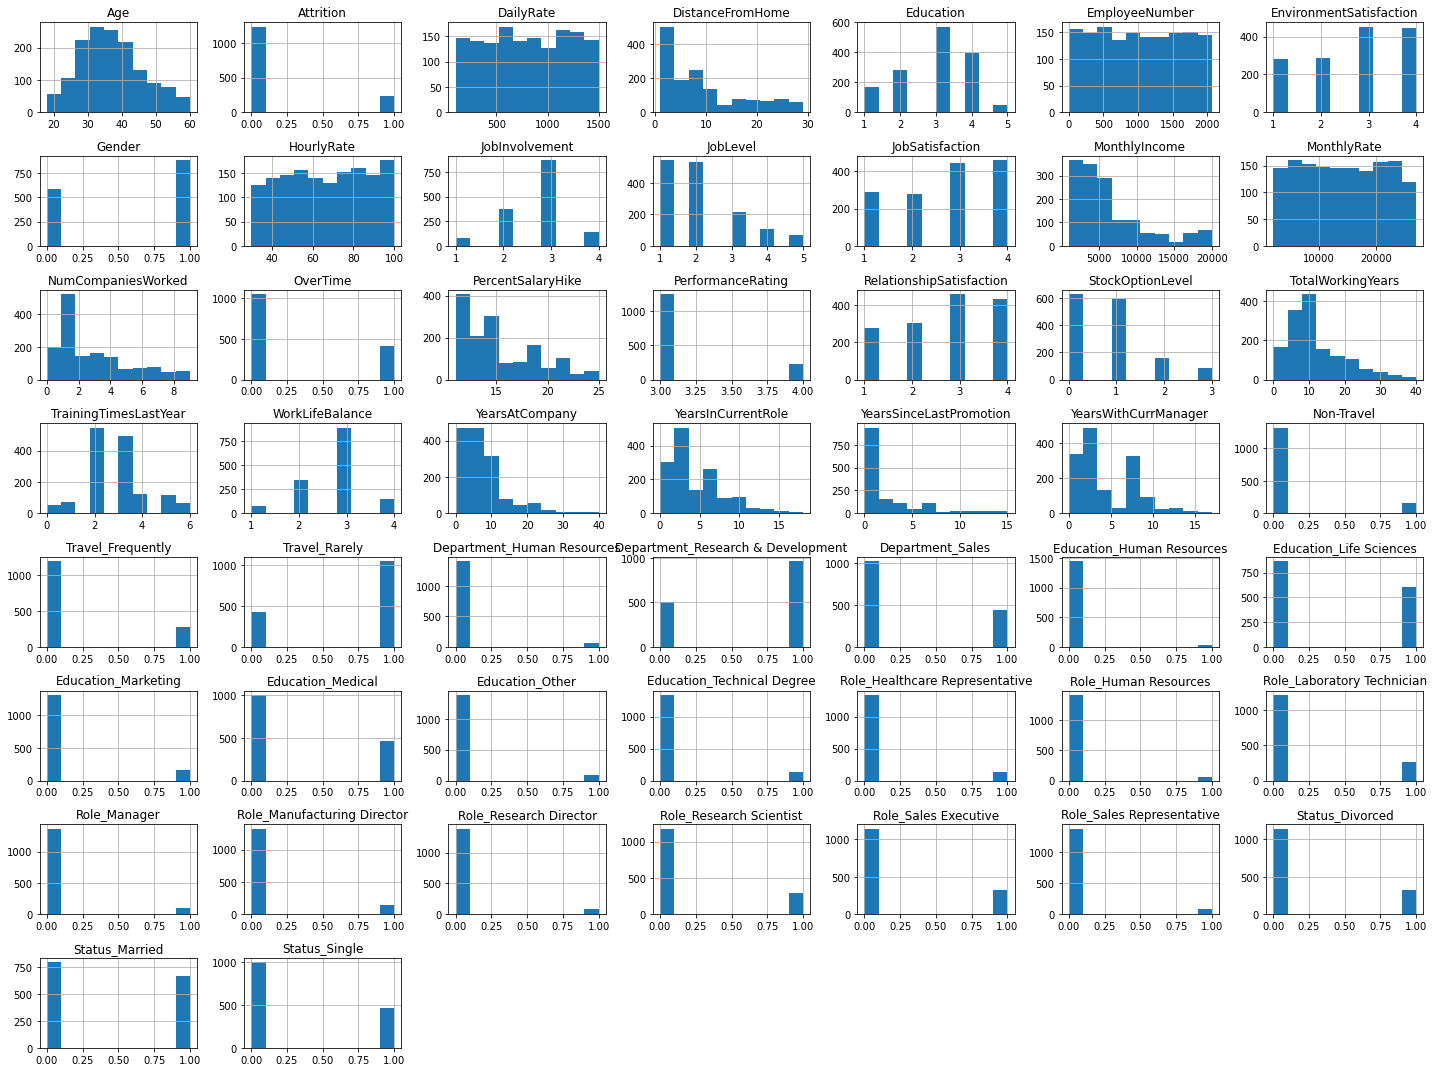

In [13]:
df.hist(figsize = (20,15))
plt.tight_layout()
plt.show()

In [12]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

### Model Training Section

In [14]:


# We have to drop the attrition data from X because that is the target variable we want the model to get trained on
# We pass attrition to y because it is our target value
X, y = df.drop('Attrition', axis = 1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier(n_jobs = -1)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [16]:
# Evaluate the model
model.score(X_test, y_test)

0.8673469387755102

In [22]:
sorted_import = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True))

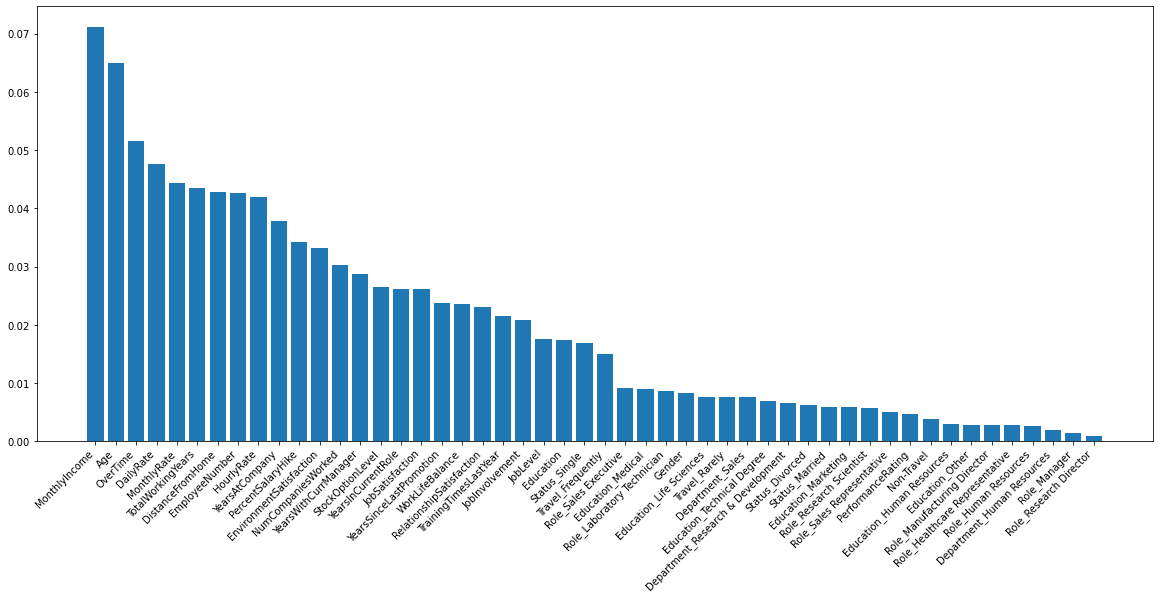

In [26]:
plt.figure(figsize=(20,8))
plt.bar(sorted_import.keys(), sorted_import.values())
plt.xticks(rotation = 45, ha='right')
plt.show()